# Прототип СГС

In [21]:
from datetime import datetime, timedelta
import pandas as pd

from wellplan.core import TeamPool
from wellplan.services import (
    TeamManager,
    FileProductionProfile,
    LinearProductionProfile,
    NPV,
    BaseCapex,
    BaseOpex,
    ClusterRandomRiskStrategy,
    DistanceTeamMovement,
)
from wellplan.services.visualization import GraphVisualizer, GantVisualizer
from wellplan.data.file.loader import ExcelWellLoader
from wellplan.data.file.saver import ExcelPlanSaver
from wellplan.builder import PlanBuilder
from wellplan.builder_default import PlanBuilder_default
from wellplan.builder_test import PlanBuilder_test

## Подгрузка файлов

In [22]:
loader = ExcelWellLoader(
    file_path=r"Ввод ЭБ 1+11 Обезлич_v2.xlsx",
)
wells = loader.load()
production_profile = FileProductionProfile(folder_path='profiles')
# production_profile = LinearProductionProfile()
coordinates = pd.read_excel(
    r"База перспективного ПФ (30.01.2025).xlsm",
    header=0,
    names=["cluster", "x", "y", "z"],
)
movement = DistanceTeamMovement.from_dicts(coordinates.to_dict(orient="records"))

## Инициализация параметров

In [55]:
team_pool = TeamPool()
team_pool.add_teams(['ГС'], num_teams=12)
team_pool.add_teams(['грп'], num_teams=12)


capex = BaseCapex(
    build_cost_per_metr={
        "ГС+ГРП": 25300,
        "ННС+ГРП": 12900,
        "МЗС": 27300,
        "МЗС+ГРП": 28300,
        "ГС": 23300,
    },
    equipment_cost=2500000,
)

opex = BaseOpex(
    oil_cost_per_tone=109.9,
    water_cost_per_tone=48.6,
    repair_per_year=3093900,
    maintain_per_year=2336200,
)


npv = NPV(
    oil_price_per_tone=13896,
    project_start_date=datetime.now(),
    capex_cost=capex,
    opex_cost=opex,
    discount_rate=0.15,
)

builder = PlanBuilder(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    production_profile=production_profile,
)

builder_default = PlanBuilder_default(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    production_profile=production_profile,
)


builder_test = PlanBuilder_test(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    production_profile=production_profile,
)



## Запуск расчета

In [56]:
plan = builder.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
print(plan)
plan.total_profit()

No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well

8668448528.481812

### "Базовый" сценарий

In [57]:
plan_default = builder_default.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
# print(plan_default)
print(f"NPV сценария: {round(plan_default.total_profit() / 1e6, 3)} млн рублей")
print(f"CAPEX сценария: {round(plan_default.total_capex() / 1e6, 3)} млн рублей")

No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well

### Оптимизированный сценарий

In [58]:
plan_test = builder_test.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
# print(plan_test)
print(f"NPV сценария: {round(plan_test.total_profit() / 1e6, 3)} млн рублей")
print(f"CAPEX сценария: {round(plan_test.total_capex() / 1e6, 3)} млн рублей")

No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well

## Выгрузка в виде "Ввод ЭБ"

In [59]:
saver = ExcelPlanSaver('plan.xlsx')
saver.save(plan_test)

/Users/sbazhukov/Documents/Работа/Система генерации сценариев/sgs_24_02/wellplan/.venv/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


## Визуализация расчетов

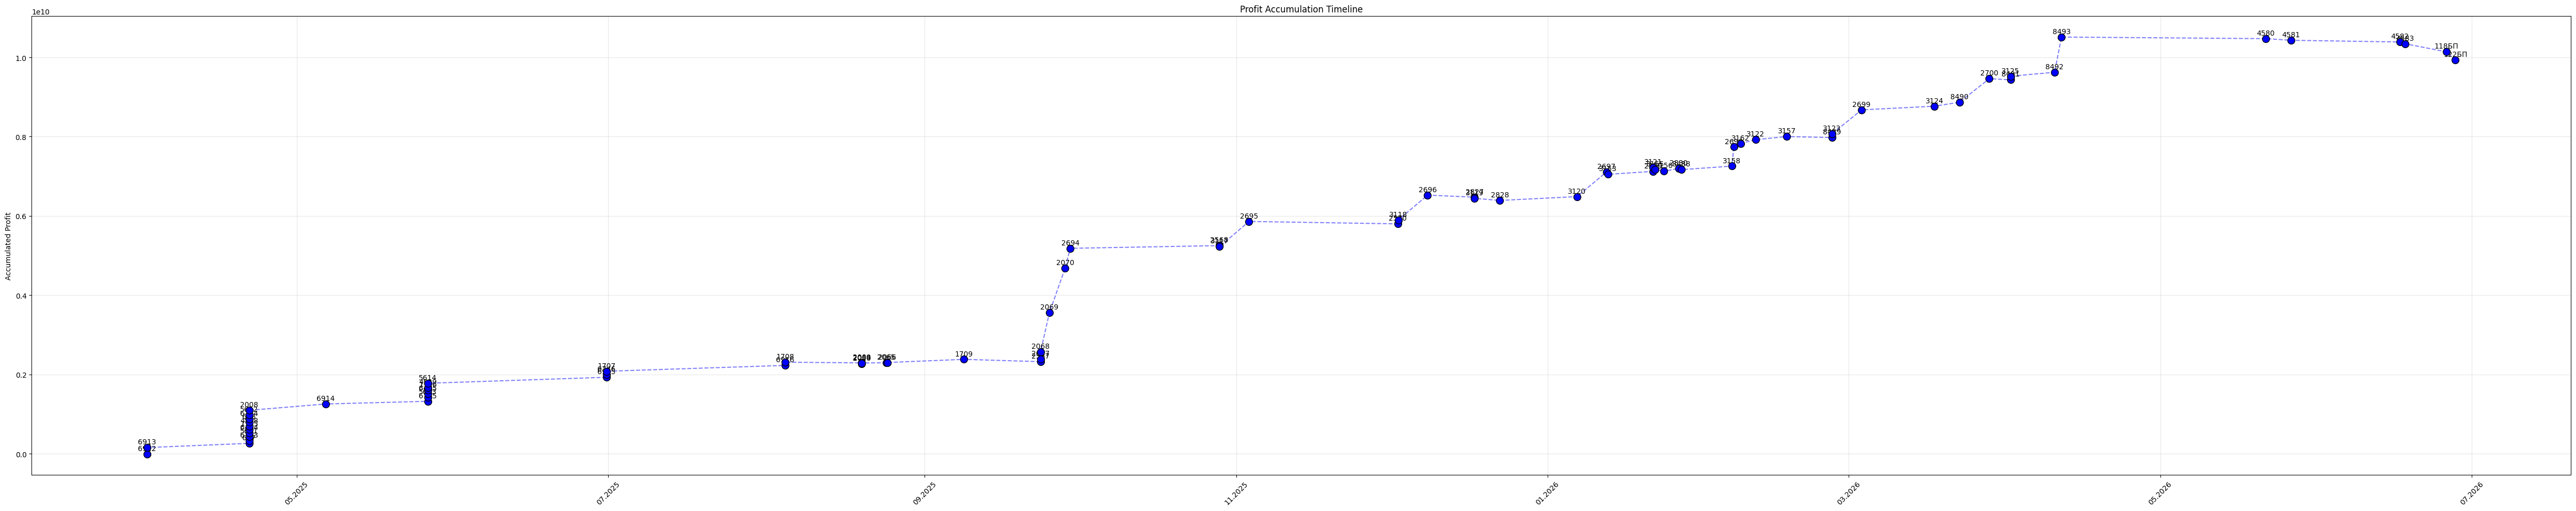

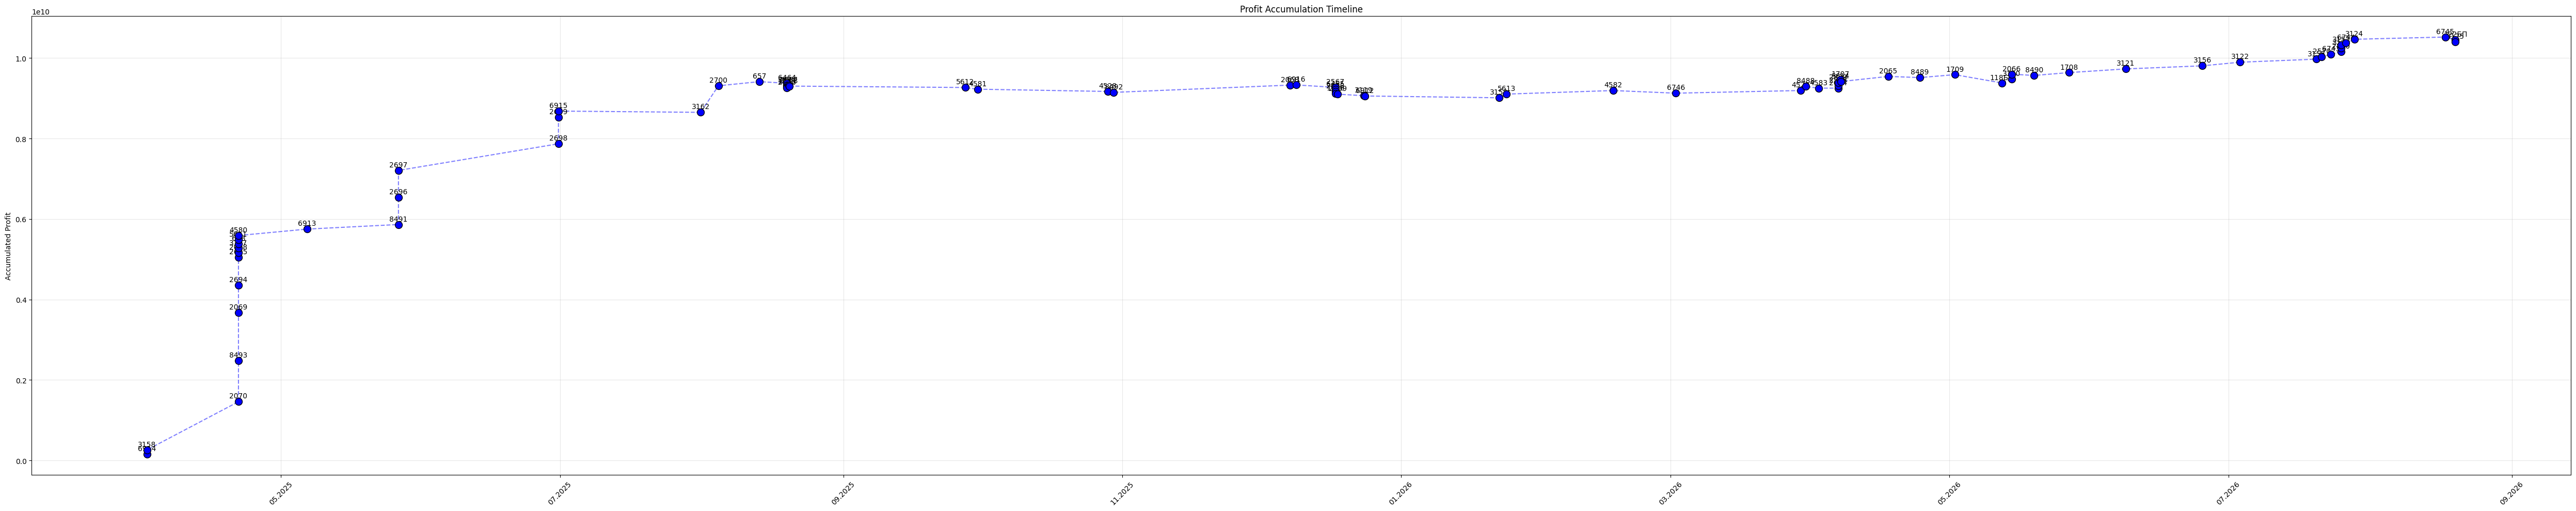

In [60]:
viz = GraphVisualizer(figsize=(50, 10))
# viz.render(plan)
viz.render(plan_default)
viz.render(plan_test)

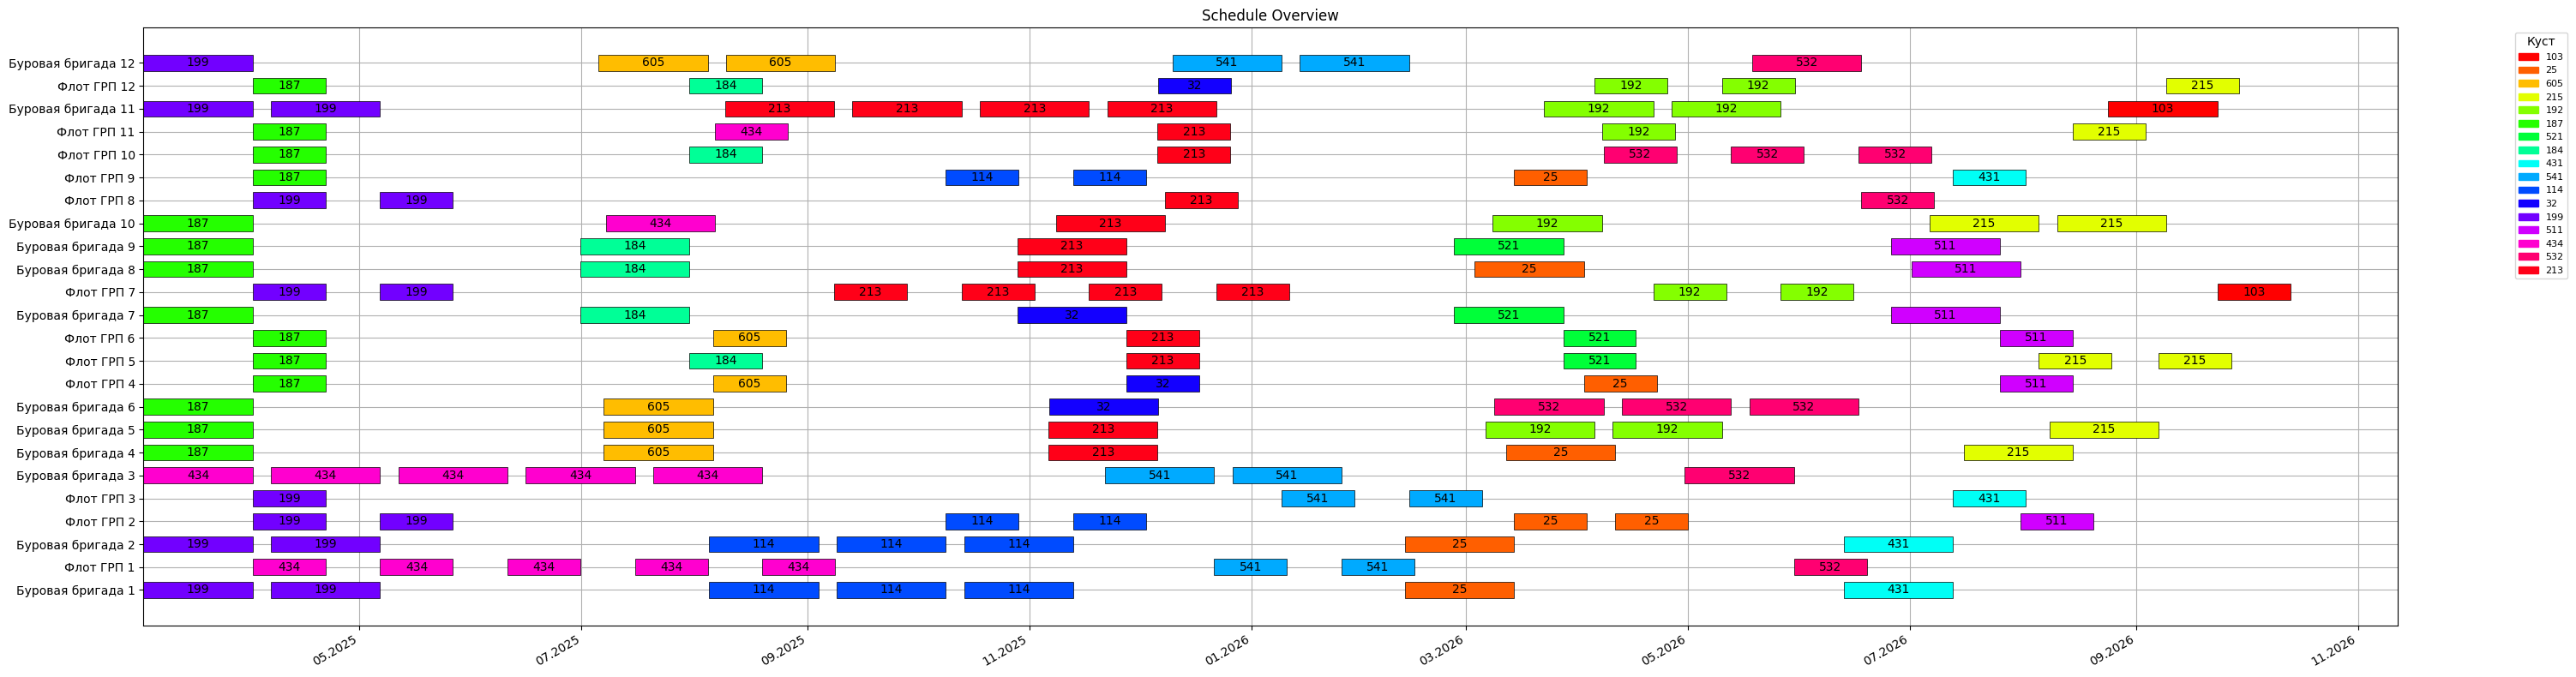

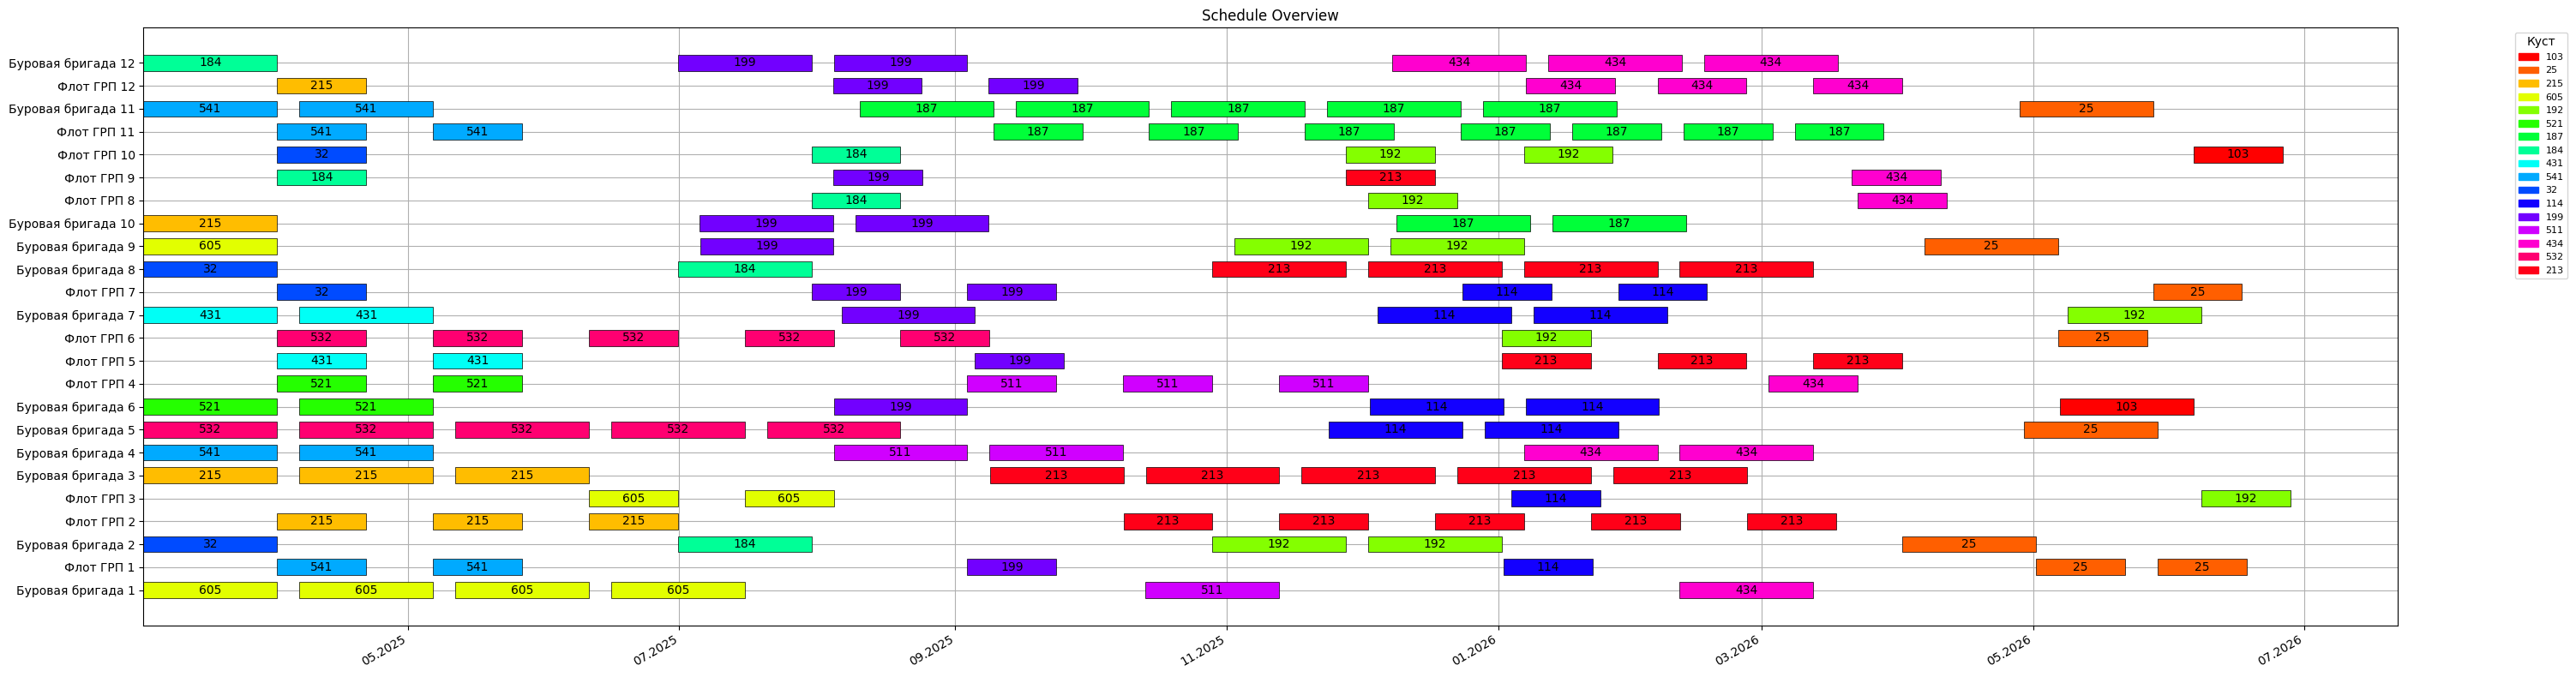

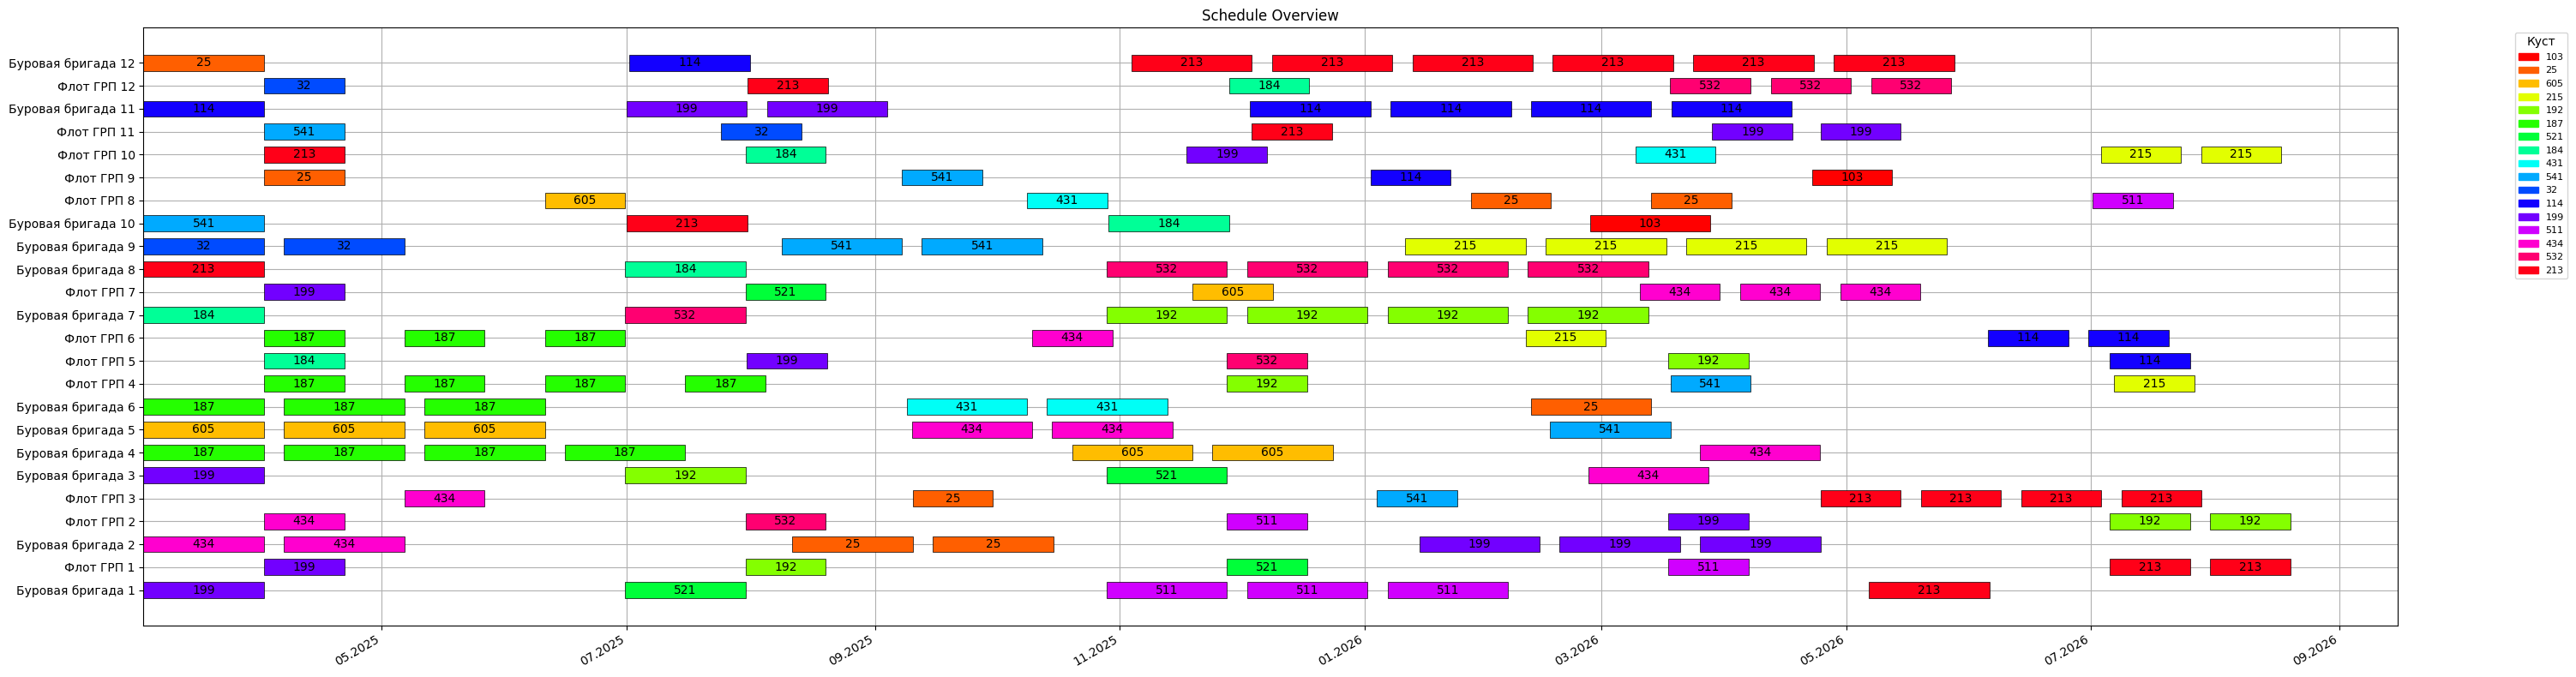

In [61]:
viz = GantVisualizer(figsize=(30, 8))
viz.render_by_teams(plan)
viz.render_by_teams(plan_default)
viz.render_by_teams(plan_test)

# Выбо оптимального количества буровых бригад

In [50]:
best_team_quantity = 0
best_npv = 0

limit_capex = 7000 * 1e6

from wellplan.builder_test import PlanBuilder_test

builder_test = PlanBuilder_test(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    production_profile=production_profile,
)

for i in range(1, 15):
        team_pool = TeamPool()
        team_pool.add_teams(['ГС'], num_teams=i)
        team_pool.add_teams(['грп'], num_teams=i)
        plan_best_team_quantity = builder_test.compile(
            wells,
            manager=TeamManager(
                team_pool=team_pool,
                movement=movement,
            ),
            risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
        )

        print(plan_best_team_quantity.total_profit())

        scenario_capex = plan_best_team_quantity.total_capex()

        if (best_npv < plan_best_team_quantity.total_profit()) and (scenario_capex < limit_capex):
            best_npv = plan_best_team_quantity.total_profit()
            best_scenario_capex = scenario_capex
            best_team_quantity = i
        
        


print(f"Лучший NPV: {round(best_npv / 1e6, 3)} млн рублей при количестве буровых бригад: {best_team_quantity}, CAPEX: {round(best_scenario_capex / 1e6,2)} млн рублей")

No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well

No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well

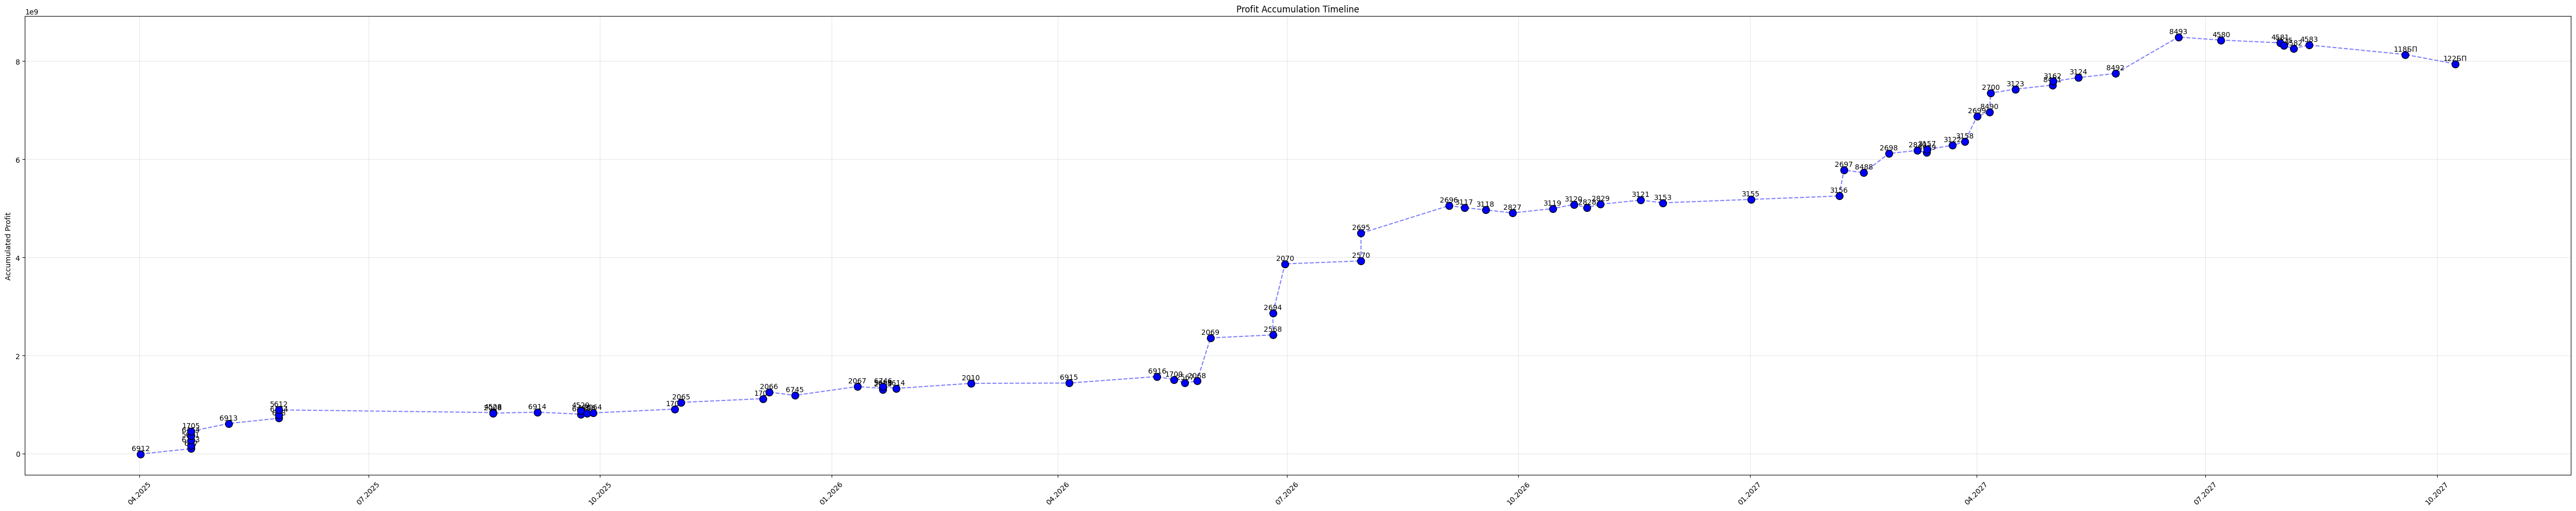

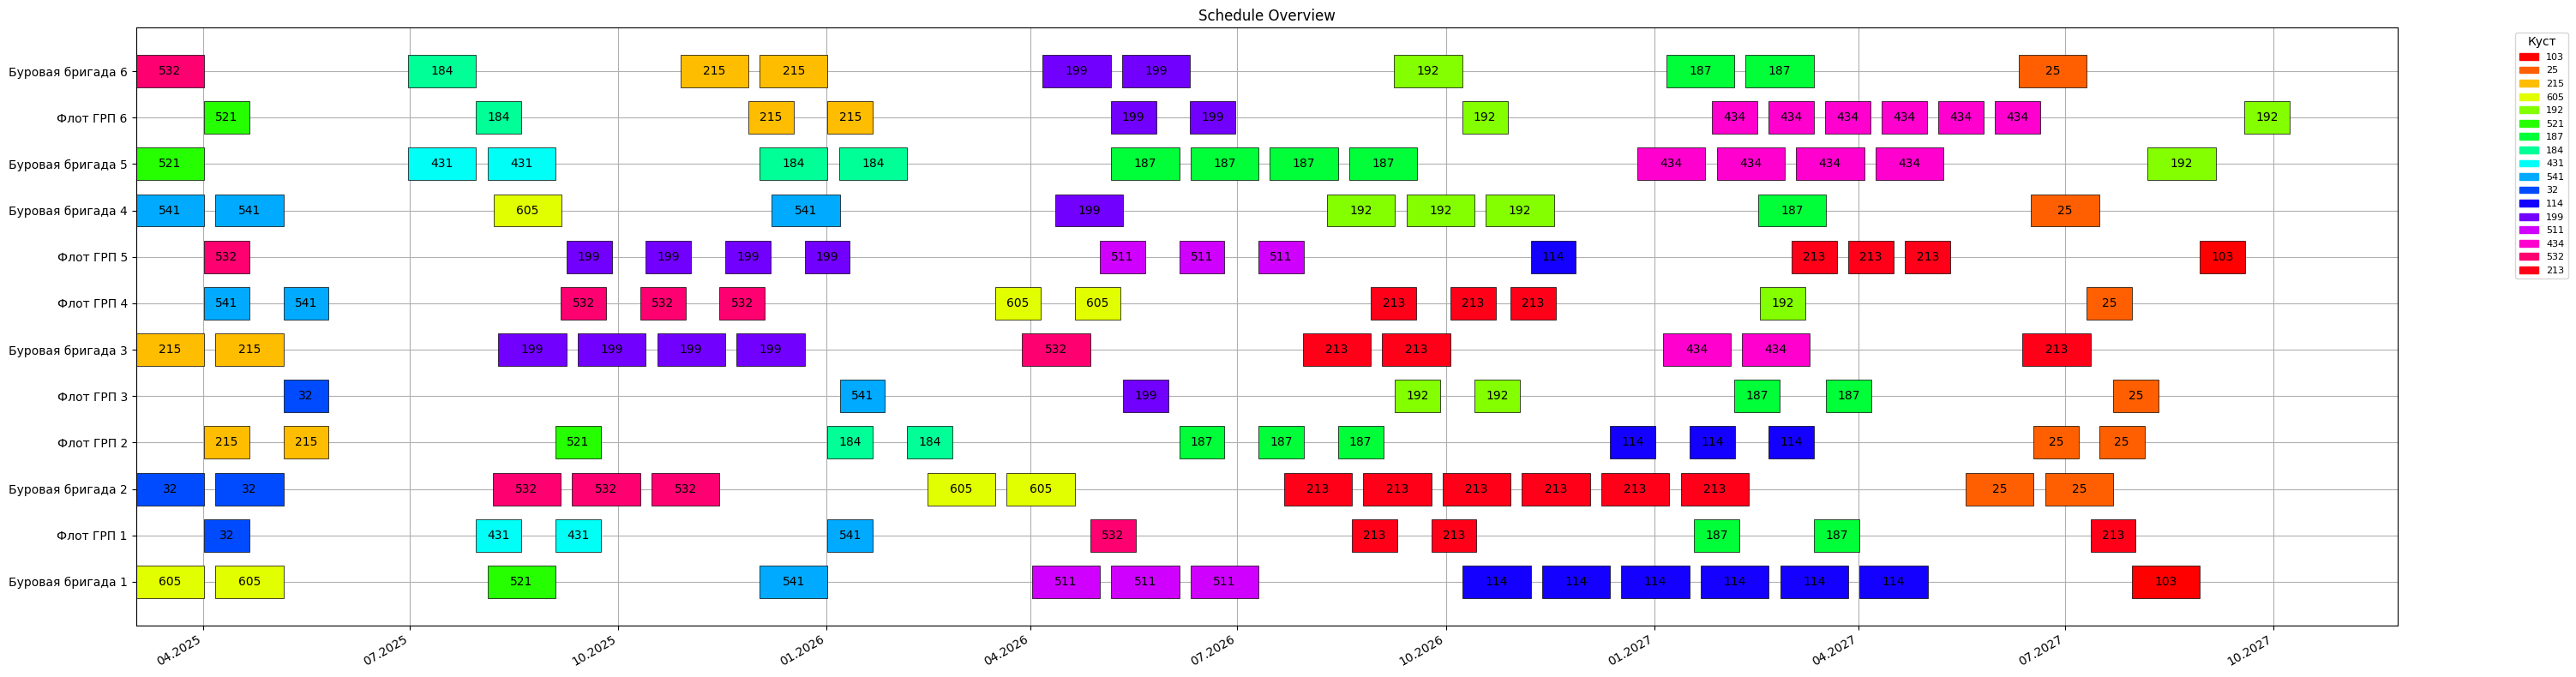

In [51]:
builder_res = PlanBuilder_default(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    production_profile=production_profile,
)
team_pool = TeamPool()
team_pool.add_teams(['ГС'], num_teams=best_team_quantity)
team_pool.add_teams(['грп'], num_teams=best_team_quantity)
plan_best_team_quantity = builder_res.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )

viz = GraphVisualizer(figsize=(50, 10))
viz.render(plan_best_team_quantity)
viz = GantVisualizer(figsize=(30, 8))
viz.render_by_teams(plan_best_team_quantity)

In [52]:
viz = GantVisualizer(figsize=(10, 30))
viz.render(plan)

NameError: name 'plan' is not defined

In [25]:
plans = []
for i in range(5):
    plan = builder.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
    plans.append(plan)

No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well

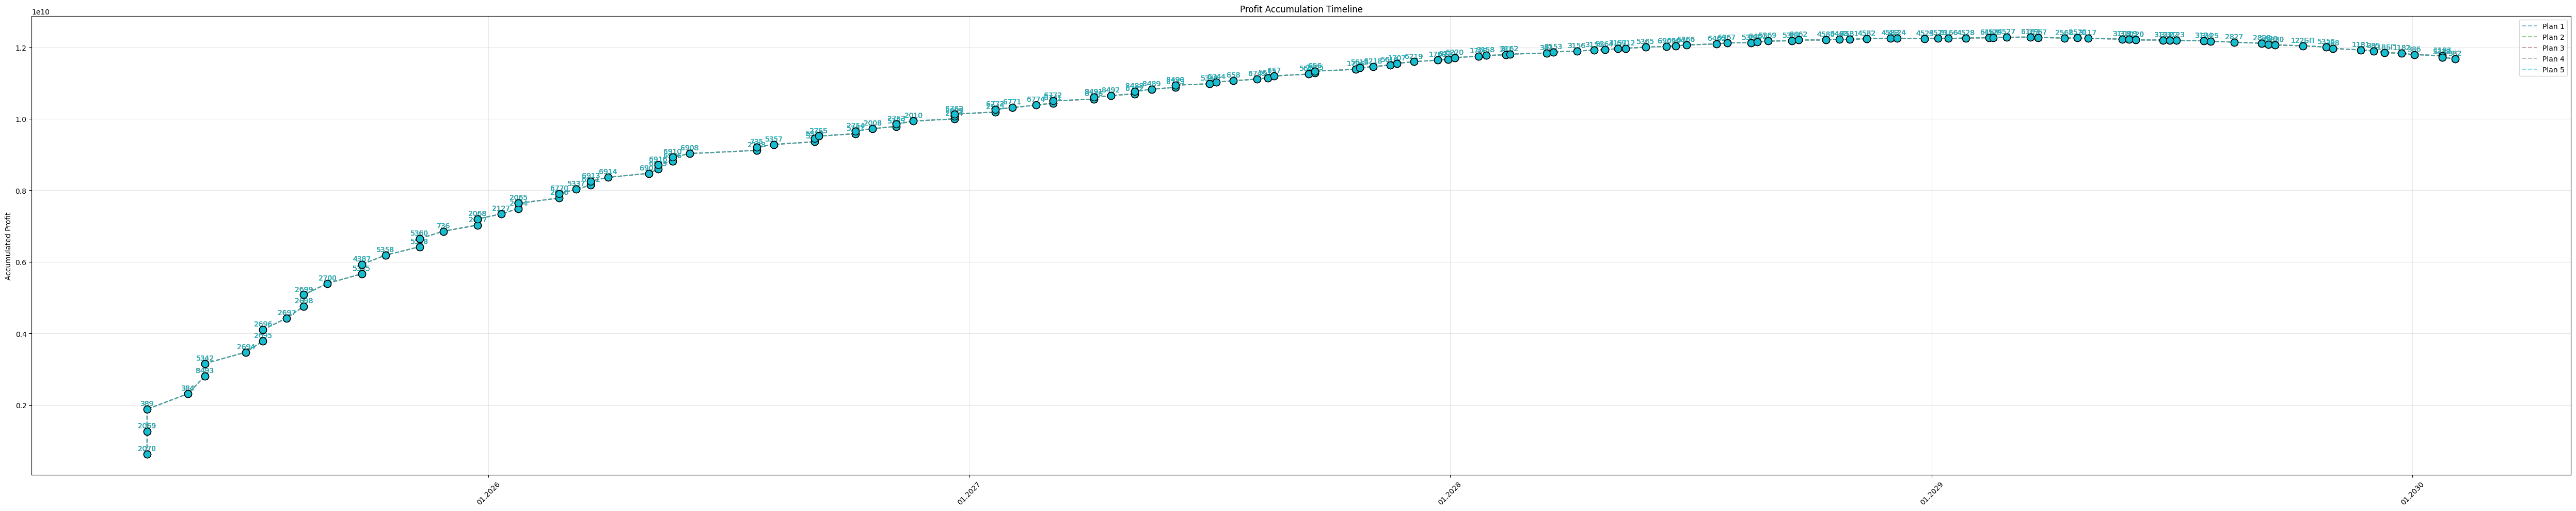

In [26]:
viz = GraphVisualizer(figsize=(50, 10))
viz.render_multiple(plans)